In [1]:
import torch

In [149]:
lr = 0.003
epochs = 100
warmup_period = 0.1
batches_per_epoch = 3

layer = torch.nn.Linear(10, 20)
optimizer = torch.optim.SGD(lr=lr, params=layer.parameters())

steps = epochs*batches_per_epoch
warmup_steps = epochs*batches_per_epoch*warmup_period

linear_warmup_sch = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.001, total_iters=warmup_steps)
cosine_sch = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=(steps-(warmup_steps)), eta_min=1e-10)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, [linear_warmup_sch, cosine_sch], milestones=[warmup_steps])

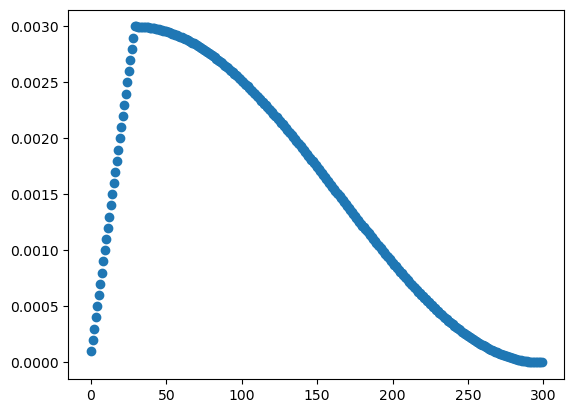

In [150]:
import matplotlib.pyplot as plt

lrs = []
for i in range(steps):
    scheduler.step()
    lrs.append(scheduler.get_last_lr())

plt.scatter(list(range(steps)), lrs)

In [151]:
min(lrs)

[1e-10]